In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
from LRGSG_package.LRGSG_plots import imshow_colorbar_caxdivider
from LRGSG_package.LRGSG_utils import move_to_rootf, width_interval
from LRGSG_package.nx_patches import signed_spectral_layout, signedlaplacian_spectrum
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


## Fully Connected

In [48]:
side = 4
eigenmode_no = 0
#
themeanField = FullyConnected(side1 = side)
SLRG_obj = SignedLaplacianAnalysis(#
    system = themeanField,
    initCond = 'delta_1', #f'ground_state_{eigenmode_no}'
    pflip= 0.1,
    t_steps = 10000,
    no_obs = 200
)
SLRG_obj.init_weights()
#
# neg_weightsG = {((i, j), (i, j+1)): -1 for i in range(SLRG_obj.system.side1) 
#                 for j in [SLRG_obj.system.side2//3, SLRG_obj.system.side2//2]}
# neg_weightsH = {(SLRG_obj.system.N//2, SLRG_obj.system.N//2+1): -1}
# SLRG_obj.flip_sel_edges(neg_weightsH, 'H')
#
SLRG_obj.flip_sel_edges({(0, 1): -1, (1, 2): -1, (1, 3): -1})
#
# SLRG_obj.flip_random_fract_edges()

In [49]:
SLRG_obj.laplacian_dynamics_init()

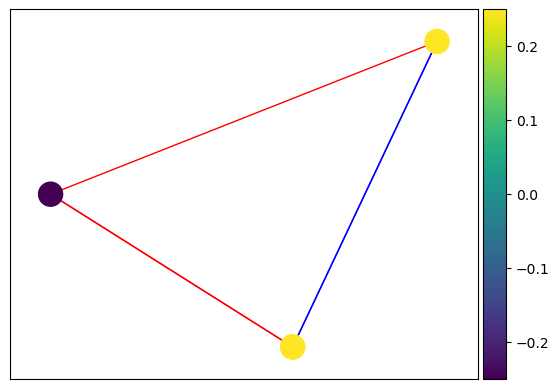

In [62]:
fig, ax = plt.subplots()
#
G = SLRG_obj.system.G
pos = nx.circular_layout(G)
#
G_nodecol = SLRG_obj.status_array #SLRG_obj.eigV.T[0]
G_edgecol = ['b' if e[2]>0 else 'r' for e in G.edges(data='weight')]
#

# pos = signed_spectral_layout(G)
# nx.draw(G, ax=ax, pos=pos, edge_color=G_edgecol, node_color=G_nodecol, 
#         cmap='viridis')
pos = signed_spectral_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color=G_nodecol, cmap='viridis')
edges = nx.draw_networkx_edges(G, pos=pos, edge_color=G_edgecol)


div, cax, clb = imshow_colorbar_caxdivider(nodes, ax)
plt.show()

In [64]:
pos

{0: array([0.45299857, 1.        ]),
 1: array([-0.584156,  0.2     ]),
 2: array([ 0.06557871, -0.6       ]),
 3: array([ 0.06557871, -0.6       ])}

In [67]:
np.linalg.eigh(SLRG_obj.sLp.todense())

(array([4.4408921e-16, 4.0000000e+00, 4.0000000e+00, 4.0000000e+00]),
 array([[-0.5       ,  0.02527916,  0.58000376,  0.642617  ],
        [ 0.5       ,  0.82423697,  0.15992816,  0.21226492],
        [-0.5       ,  0.4198208 ,  0.31426501, -0.68919373],
        [-0.5       ,  0.37913701, -0.73434061,  0.25884166]]))

In [ ]:
nodes

In [58]:
SLRG_obj.run_laplacian_dynamics(
    rescaled=False,
    saveFrames=True)

Beginning Laplacian dynamics.


 89%|████████▉ | 35707/39999 [00:00<00:00, 39978.00it/s]

Convergence reached.


In [59]:
SLRG_obj.eigV.T[0]/SLRG_obj.eigV.T[0].max(), SLRG_obj.status_array/SLRG_obj.status_array.max()

(array([ 1., -1.,  1.,  1.]),
 array([ 0.9999975, -0.9999975,  1.       ,  0.9999975]))

In [60]:
np.linalg.eigh(SLRG_obj.sLp.todense())

(array([4.4408921e-16, 4.0000000e+00, 4.0000000e+00, 4.0000000e+00]),
 array([[-0.5       ,  0.02527916,  0.58000376,  0.642617  ],
        [ 0.5       ,  0.82423697,  0.15992816,  0.21226492],
        [-0.5       ,  0.4198208 ,  0.31426501, -0.68919373],
        [-0.5       ,  0.37913701, -0.73434061,  0.25884166]]))

In [61]:
SLRG_obj.make_animation_fromFrames(fps=20)

# of frames:  159
